In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline


pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/home/ggjinbuntu/lendingclubcsv/preproccssedlendq1.csv', low_memory=False)

In [3]:
df.tail()

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,acc_now_delinq,pub_rec_bankruptcies,RENT,OWN,MORTGAGE,OTHER,NONE,issue_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
42501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5350.0,5350.0,0.116822,36.0,13.12,180.57,18,1.0,4000.0,0,0,15.00,0.0,10,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,10000.0,0.035000,36.0,14.70,345.18,12,1.0,50000.0,0,0,7.22,2.0,17,0.0,14.0,0.0,10025.0,85.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0.637500,36.0,7.12,61.87,40,7.0,150000.0,0,0,5.60,0.0,32,0.0,7.0,0.0,150786.0,2.2,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42504,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,6000.0,0.108333,36.0,10.59,195.28,27,1.0,20000.0,0,0,12.90,0.0,20,4.0,5.0,0.0,13660.0,66.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400.0,4400.0,0.318182,36.0,9.64,141.25,31,2.0,30000.0,0,0,3.72,0.0,12,0.0,4.0,0.0,3493.0,63.5,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_X = df.drop(['loan_status'], axis=1)

In [5]:
df_y = df['loan_status']

In [6]:
df_X.tail()

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,acc_now_delinq,pub_rec_bankruptcies,RENT,OWN,MORTGAGE,OTHER,NONE,issue_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
42501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5350.0,5350.0,0.116822,36.0,13.12,180.57,18,1.0,4000.0,0,15.00,0.0,10,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,10000.0,0.035000,36.0,14.70,345.18,12,1.0,50000.0,0,7.22,2.0,17,0.0,14.0,0.0,10025.0,85.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0.637500,36.0,7.12,61.87,40,7.0,150000.0,0,5.60,0.0,32,0.0,7.0,0.0,150786.0,2.2,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42504,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,6000.0,0.108333,36.0,10.59,195.28,27,1.0,20000.0,0,12.90,0.0,20,4.0,5.0,0.0,13660.0,66.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400.0,4400.0,0.318182,36.0,9.64,141.25,31,2.0,30000.0,0,3.72,0.0,12,0.0,4.0,0.0,3493.0,63.5,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_y.tail()

42501    0
42502    0
42503    0
42504    0
42505    0
Name: loan_status, dtype: int64

In [8]:
#Split data for validation
X, y = df_X, df_y
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
#Make an adaboost classifier class
adaboost = AdaBoostClassifier()

In [10]:
#Make a model with training data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [11]:
adaboost.score(X_test, y_test)

0.84746400677519529

In [12]:
adaboost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [13]:
#Make a decisiontree classifier class
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
clf.score(X_test, y_test)

0.75110567422602803

In [16]:
l1 = cross_val_score(adaboost, X_test, y_test, cv= 10)

In [17]:
l2 = cross_val_score(clf, X_test, y_test, cv= 10)

In [18]:
l1.mean()

0.84652324356234487

In [19]:
l2.mean()

0.75957294335887027

In [20]:
# boosted decision tree model shows better performance!
l1.mean() - l2.mean()

0.086950300203474606

In [21]:
# Plotting ROC curve

In [22]:
cfr = AdaBoostClassifier().fit(X_train,y_train)
y_score = cfr.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test.values, y_score)
roc_auc = auc(fpr, tpr)

In [23]:
# cfr = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)).fit(X_train,y_train)
# y_score = cfr.decision_function(X_test)
# fpr, tpr, _ = roc_curve(y_test.values, y_score)
# roc_auc = auc(fpr, tpr)

In [24]:
cfr

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [25]:
cfr.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
cfr = AdaBoostClassifier().fit(X_train, y_train)
y_score = cfr.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test.values, y_score)
roc_auc = auc(fpr, tpr)

In [27]:
# cfr2 = DecisionTreeClassifier().fit(X_train, y_train)
# y_score2 = cfr2.decision_function(X_test)
# fpr2, tpr2, _2 = roc_curve(y_test.values, y_score2)
# roc_auc2 = auc(fpr2, tpr2)

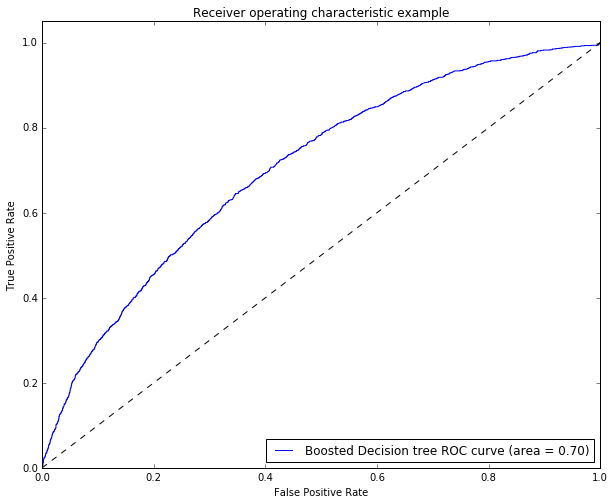

In [28]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Boosted Decision tree ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(fpr2, tpr2, color='red', label='Decision Tree ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
## Study prediction results
y_pred = cfr.predict(X_test)

In [30]:
sum(y_pred)

124